<a href="https://colab.research.google.com/github/raultyv/Machine_learning/blob/main/Clase_LR_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:63: SyntaxWarning: invalid escape sequence '\s'
<>:63: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-1870633586.py:63: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]), sep='\s+', header=None, names=['Columna1', 'Columna2'])


Saving DATA.txt to DATA (5).txt
   Columna1  Columna2
0    204490     67626
1    230977     61605
2    229336     72508
3    230574     75142
4    204509     69786
MSE: 220491910.42363548


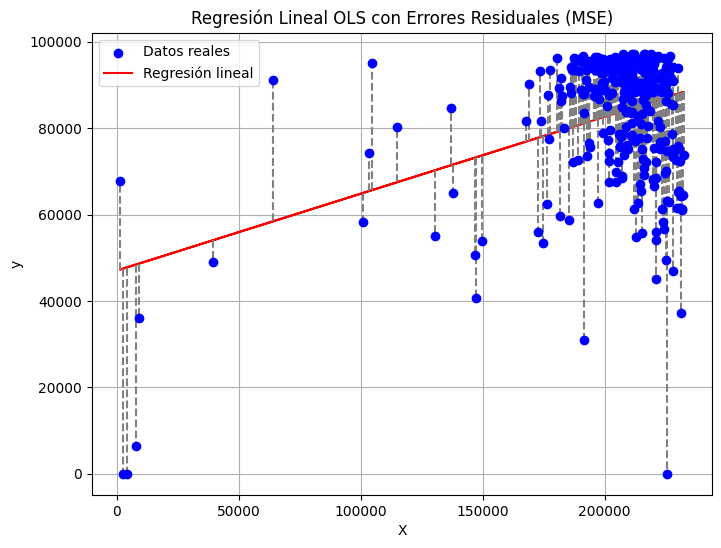

Ecuación: y = 46996.9686 + (0.1781 * X1)
Intercepto: [46996.96860332]
Coeficientes: [[0.17805376]]
R cuadrado (Precisión): 0.1386


/tmp/ipython-input-1870633586.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  b = float(self.intercept_)
/tmp/ipython-input-1870633586.py:46: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  coef_valor = float(c)


In [16]:
import numpy as np
import matplotlib.pyplot as plt

# =========================
# Regresión Lineal - OLS
# =========================
class LinearRegression:
    def __init__(self):
        self.coef_ = None
        self.intercept_ = None

    def fit(self, X, y):
        X = np.asarray(X)
        y = np.asarray(y)

        X_bias = np.c_[np.ones(X.shape[0]), X]
        w = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

        self.intercept_ = w[0]
        self.coef_ = w[1:]

    def predict(self, X):
        X = np.asarray(X)
        return X @ self.coef_ + self.intercept_

    def getIntercepto(self):
        return self.intercept_

    def getCoeficientes(self):
        return self.coef_

    # --- Nuevas funciones ---

    def score(self, X, y):
        y_pred = self.predict(X)
        ss_res = np.sum((np.asarray(y).flatten() - y_pred.flatten()) ** 2)
        ss_tot = np.sum((np.asarray(y).flatten() - np.mean(y)) ** 2)
        return 1 - (ss_res / ss_tot)

    def get_equation(self):
      b = float(self.intercept_)
      eq = f"y = {b:.4f}"

    # Recorre cada coeficiente y le asigna X1, X2, X3...
      for i, c in enumerate(self.coef_):
          coef_valor = float(c)
          eq += f" + ({coef_valor:.4f} * X{i+1})"
      return eq
# =========================
# Dataset
# =========================
from google.colab import files
uploaded = files.upload()
import pandas as pd
import io

# 1. Obtener el nombre del archivo que subiste
nombre_archivo = list(uploaded.keys())[0]

# 2. Leer el archivo
# 'header=None' indica que no hay cabecera
# 'names' le da nombre a tus dos columnas
df = pd.read_csv(io.BytesIO(uploaded[nombre_archivo]), sep='\s+', header=None, names=['Columna1', 'Columna2'])

# Mostrar los datos
print(df.head())

# Si tienes 3 predictores
#predictores = ['height(cm)', 'age_at_inauguration', 'weight_kg']
#X_multiple = data[predictores].values  # Esto ya es una matriz de (N, 3)

X=np.array(df['Columna1']).reshape(-1, 1) #solo para 1 predictor se usa el reshape / reemplazar por X_multiple
y=np.array(df['Columna2']).reshape(-1, 1)

# =========================
# Entrenamiento
# =========================
modelo = LinearRegression()
modelo.fit(X, y)

y_pred = modelo.predict(X)

# =========================
# Errores residuales
# =========================
error_residual = y - y_pred

# =========================
# MSE
# =========================
mse = np.mean(error_residual**2)
print("MSE:", mse)

# =========================
# Gráfica
# =========================
plt.figure(figsize=(8, 6))

# Puntos reales
plt.scatter(X, y, label="Datos reales", color="blue", zorder=3)

# Recta de regresión
plt.plot(X, y_pred, label="Regresión lineal", color="red")

# Errores residuales
for i in range(len(X)):
    plt.vlines(X[i], y_pred[i], y[i], colors="gray", linestyles="dashed")

plt.xlabel("X")
plt.ylabel("y")
plt.title("Regresión Lineal OLS con Errores Residuales (MSE)")
plt.legend()
plt.grid(True)

plt.show()


print(f"Ecuación: {modelo.get_equation()}")
print(f"Intercepto: {modelo.intercept_}")
print(f"Coeficientes: {modelo.coef_}")
print(f"R cuadrado (Precisión): {modelo.score(X, y):.4f}")